In [183]:
!pip install wordcloud

In [222]:
import pandas as pd
import plotly.express as px
from collections import Counter
import re
from wordcloud import WordCloud 
import matplotlib as plt

df = pd.read_csv('DojoDataset01.csv')   
df

,Quote,Character,Anime
0,"People’s lives don’t end when they die, it end...",Itachi Uchiha,Naruto
1,"If you don’t take risks, you can’t create a fu...",Monkey D Luffy,One Piece
2,"If you don’t like your destiny, don’t accept it.",Naruto Uzumaki,Naruto
3,"When you give up, that’s when the game ends.",Mitsuyoshi Anzai,Slam Dunk
4,All we can do is live until the day we die. Co...,Deneil Young,Uchuu Kyoudai or Space Brothers
...,...,...,...
116,Life s a bore if you don t challenge yourself,Yuu Nishinoya,Haikyuu
117,There are some flowers you only see when you t...,Tanaka Saeko,Haikyuu
118,Being weak means that there is room to grow,Ittetsu Takeda,Haikyuu
119,Today might be the chance to grasp the chance ...,Tooru Oikawa,Haikyuu


In [186]:
df2 = pd.read_csv('DojoDataset02.csv', sep =';')
df2

,ID,Anime,Character,Quote,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,(Naruto),Pain,Because of the existence of love - sacrifice i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8597,(Mobile Suit Gundam Seed),Lacus Clyne,Is it weapons that are the cause of all this f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,8598,(Mobile Suit Gundam Seed),Kira Yamato,"What can you protect, if your only weapon are ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,8599,(Code Geass: Lelouch of the Rebellion),C.C.,Do you know why snow is white..? Because it fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,8600,(Tengen Toppa Gurren Lagann),Kamina,Don't believe in yourself. Believe in ME who b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
df.head()

,Quote,Character,Anime
0,"People’s lives don’t end when they die, it end...",Itachi Uchiha,Naruto
1,"If you don’t take risks, you can’t create a fu...",Monkey D Luffy,One Piece
2,"If you don’t like your destiny, don’t accept it.",Naruto Uzumaki,Naruto
3,"When you give up, that’s when the game ends.",Mitsuyoshi Anzai,Slam Dunk
4,All we can do is live until the day we die. Co...,Deneil Young,Uchuu Kyoudai or Space Brothers


In [188]:
df2.head()

,ID,Anime,Character,Quote,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,(Naruto),Pain,Because of the existence of love - sacrifice i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quote      121 non-null    object
 1   Character  121 non-null    object
 2   Anime      120 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB


In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           8494 non-null   object
 1   Anime        8436 non-null   object
 2   Character    8366 non-null   object
 3   Quote        8356 non-null   object
 4   Unnamed: 4   2 non-null      object
 5   Unnamed: 5   1 non-null      object
 6   Unnamed: 6   1 non-null      object
 7   Unnamed: 7   1 non-null      object
 8   Unnamed: 8   1 non-null      object
 9   Unnamed: 9   1 non-null      object
 10  Unnamed: 10  1 non-null      object
 11  Unnamed: 11  1 non-null      object
dtypes: object(12)
memory usage: 821.4+ KB


In [191]:
df.describe()

,Quote,Character,Anime
count,121,121,120
unique,118,94,63
top,Every journey begins with a single step. We ju...,Monkey D Luffy,Attack on Titan
freq,2,4,12


In [192]:
df2.describe()

,ID,Anime,Character,Quote,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,8494,8436,8366,8356,2,1,1,1,1,1,1,1
unique,8490,848,2334,8348,2,1,1,1,1,1,1,1
top,"""",(Naruto),Hachiman Hikigaya,"Bitter crimson tears flow from lifeless eyes, ...","there's no other way but to work.""",fight,are injured,feel joy,sadness,hate someone,love someone. All in just a moment. And then,are embraced by the eternal sleep called death.
freq,3,504,96,2,1,1,1,1,1,1,1,1


In [193]:
df.isnull()

,Quote,Character,Anime
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
116,False,False,False
117,False,False,False
118,False,False,False
119,False,False,False


In [194]:
df2.isnull()

,ID,Anime,Character,Quote,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,False,False,False,False,True,True,True,True,True,True,True,True
1,False,False,False,False,True,True,True,True,True,True,True,True
2,False,False,False,False,True,True,True,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,True,True,True,True,True,True,True,True
8756,False,False,False,False,True,True,True,True,True,True,True,True
8757,False,False,False,False,True,True,True,True,True,True,True,True
8758,False,False,False,False,True,True,True,True,True,True,True,True


In [195]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
116    False
117    False
118    False
119    False
120    False
Length: 121, dtype: bool

In [196]:
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

In [197]:
df.isnull().sum()

Quote        0
Character    0
Anime        1
dtype: int64

In [198]:
df2.isnull().sum()

ID              266
Anime           324
Character       394
Quote           404
Unnamed: 4     8758
Unnamed: 5     8759
Unnamed: 6     8759
Unnamed: 7     8759
Unnamed: 8     8759
Unnamed: 9     8759
Unnamed: 10    8759
Unnamed: 11    8759
dtype: int64

In [199]:
df3 = df2[['Anime', 'Character', 'Quote']]
df3

,Anime,Character,Quote
0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...
1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and..."
2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ..."
3,(Naruto),Pain,Because of the existence of love - sacrifice i...
4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...
...,...,...,...
8755,(Mobile Suit Gundam Seed),Lacus Clyne,Is it weapons that are the cause of all this f...
8756,(Mobile Suit Gundam Seed),Kira Yamato,"What can you protect, if your only weapon are ..."
8757,(Code Geass: Lelouch of the Rebellion),C.C.,Do you know why snow is white..? Because it fo...
8758,(Tengen Toppa Gurren Lagann),Kamina,Don't believe in yourself. Believe in ME who b...


In [200]:
df = df[['Character', "Quote"]]
df

,Character,Quote
0,Itachi Uchiha,"People’s lives don’t end when they die, it end..."
1,Monkey D Luffy,"If you don’t take risks, you can’t create a fu..."
2,Naruto Uzumaki,"If you don’t like your destiny, don’t accept it."
3,Mitsuyoshi Anzai,"When you give up, that’s when the game ends."
4,Deneil Young,All we can do is live until the day we die. Co...
...,...,...
116,Yuu Nishinoya,Life s a bore if you don t challenge yourself
117,Tanaka Saeko,There are some flowers you only see when you t...
118,Ittetsu Takeda,Being weak means that there is room to grow
119,Tooru Oikawa,Today might be the chance to grasp the chance ...


In [201]:
df3 = df3.dropna()
df3.isnull().sum()

Anime        0
Character    0
Quote        0
dtype: int64

In [202]:
df.isnull().sum()

Character    0
Quote        0
dtype: int64

In [203]:
df3['Quote'] = df3['Quote'].astype("string")
df3['Character'] = df3['Character'].astype("string")
df3.dtypes

/var/folders/1_/fh875ztj2j9996qcwb55zj7w0000gq/T/ipykernel_12034/678819232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Quote'] = df3['Quote'].astype("string")
/var/folders/1_/fh875ztj2j9996qcwb55zj7w0000gq/T/ipykernel_12034/678819232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Character'] = df3['Character'].astype("string")


Anime                object
Character    string[python]
Quote        string[python]
dtype: object

In [204]:
df3['Quote']= df3['Quote'].str.lower()
df3['Character']= df3['Character'].str.lower()
df3

/var/folders/1_/fh875ztj2j9996qcwb55zj7w0000gq/T/ipykernel_12034/121613484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Quote']= df3['Quote'].str.lower()
/var/folders/1_/fh875ztj2j9996qcwb55zj7w0000gq/T/ipykernel_12034/121613484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Character']= df3['Character'].str.lower()


,Anime,Character,Quote
0,(Soul Eater),soul eater,in the end the shape and form don't matter at ...
1,(ReLIFE),ooga kazuomi,"i'm still a man too, i wanted to look calm and..."
2,(Psycho-Pass Extended Edition),makishima shougo,"clausewitz, he pointed out that no matter how ..."
3,(Naruto),pain,because of the existence of love - sacrifice i...
4,(Detective Conan),ran mouri,courage is a word of justice. it means the qua...
...,...,...,...
8755,(Mobile Suit Gundam Seed),lacus clyne,is it weapons that are the cause of all this f...
8756,(Mobile Suit Gundam Seed),kira yamato,"what can you protect, if your only weapon are ..."
8757,(Code Geass: Lelouch of the Rebellion),c.c.,do you know why snow is white..? because it fo...
8758,(Tengen Toppa Gurren Lagann),kamina,don't believe in yourself. believe in me who b...


In [205]:
df4 = pd.concat([df3,df])
df4

,Anime,Character,Quote
0,(Soul Eater),soul eater,in the end the shape and form don't matter at ...
1,(ReLIFE),ooga kazuomi,"i'm still a man too, i wanted to look calm and..."
2,(Psycho-Pass Extended Edition),makishima shougo,"clausewitz, he pointed out that no matter how ..."
3,(Naruto),pain,because of the existence of love - sacrifice i...
4,(Detective Conan),ran mouri,courage is a word of justice. it means the qua...
...,...,...,...
116,NaN,Yuu Nishinoya,Life s a bore if you don t challenge yourself
117,NaN,Tanaka Saeko,There are some flowers you only see when you t...
118,NaN,Ittetsu Takeda,Being weak means that there is room to grow
119,NaN,Tooru Oikawa,Today might be the chance to grasp the chance ...


In [206]:
df4.isnull().sum()

Anime        121
Character      0
Quote          0
dtype: int64

In [207]:
df4 = df4.dropna()
df4

,Anime,Character,Quote
0,(Soul Eater),soul eater,in the end the shape and form don't matter at ...
1,(ReLIFE),ooga kazuomi,"i'm still a man too, i wanted to look calm and..."
2,(Psycho-Pass Extended Edition),makishima shougo,"clausewitz, he pointed out that no matter how ..."
3,(Naruto),pain,because of the existence of love - sacrifice i...
4,(Detective Conan),ran mouri,courage is a word of justice. it means the qua...
...,...,...,...
8755,(Mobile Suit Gundam Seed),lacus clyne,is it weapons that are the cause of all this f...
8756,(Mobile Suit Gundam Seed),kira yamato,"what can you protect, if your only weapon are ..."
8757,(Code Geass: Lelouch of the Rebellion),c.c.,do you know why snow is white..? because it fo...
8758,(Tengen Toppa Gurren Lagann),kamina,don't believe in yourself. believe in me who b...


In [208]:
df4['Anime']= df4['Anime'].str.lower()
df4

/var/folders/1_/fh875ztj2j9996qcwb55zj7w0000gq/T/ipykernel_12034/2885783757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Anime']= df4['Anime'].str.lower()


,Anime,Character,Quote
0,(soul eater),soul eater,in the end the shape and form don't matter at ...
1,(relife),ooga kazuomi,"i'm still a man too, i wanted to look calm and..."
2,(psycho-pass extended edition),makishima shougo,"clausewitz, he pointed out that no matter how ..."
3,(naruto),pain,because of the existence of love - sacrifice i...
4,(detective conan),ran mouri,courage is a word of justice. it means the qua...
...,...,...,...
8755,(mobile suit gundam seed),lacus clyne,is it weapons that are the cause of all this f...
8756,(mobile suit gundam seed),kira yamato,"what can you protect, if your only weapon are ..."
8757,(code geass: lelouch of the rebellion),c.c.,do you know why snow is white..? because it fo...
8758,(tengen toppa gurren lagann),kamina,don't believe in yourself. believe in me who b...


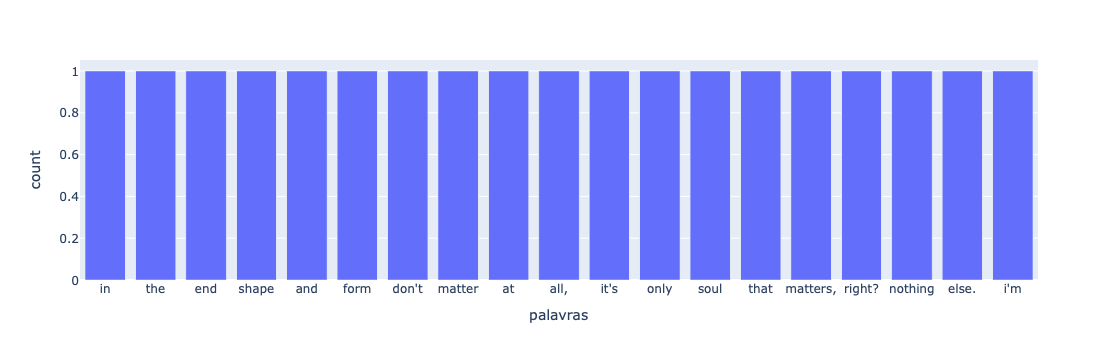

In [239]:
text = " ".join(df4["Quote"])

words = text.split()

words_count = Counter(words)

grapyc = pd.DataFrame(words_count.items(), columns=['palavras','contagens'])
grapyc = grapyc['palavras'].iloc[0:19]

plt = px.bar(grapyc, x='palavras')
plt.show()

In [224]:
df4['Quote'].plot.hist()

TypeError: no numeric data to plot